## Simple Linear Regression Model 
#### Stephen D. Barnes, MHSc

###  1. First, we're going to install and import the relevant libraries and packages

In [4]:
!pip install tensorflow
import tensorflow as tf
!pip install ipykernel
import numpy as np #needed for mathematical operations
import matplotlib.pyplot as plt #for plotting
from mpl_toolkits.mplot3d import Axes3D #for 3D representation

print("Packages installed successfully") #I ususally put this at the end of installation in order to visually see that the program has worked through the whole cell. 

Packages installed successfully


### 2. Next, generate random input data that can be trained


In [6]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


#### the targets above: targets = f(x,z) = 2*x - 3*z + 5 + noise
#### w1 = 2*x, w2 = -3*z, bias = 5+, noise = randomized data points that may not affect the model

### 3. Create the targets we want to aim for

In [8]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


### 4. Plot the training data
Here, we plan to coorelate the data and notice the trend that our model should replicate. 


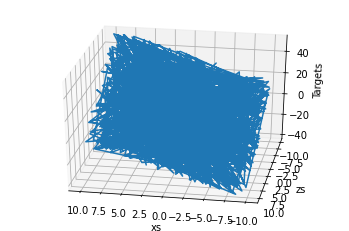

In [14]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

#### Initialize the variables


In [19]:
init_range = 0.1
weights = np.random.uniform(-init_range,init_range, size=(2,1))
biases = np.random.uniform(-init_range,init_range,size=1)

print(weights)
print(biases)

#initial weights and biases are chosen at random from the range [-0.1 , 0.1]

[[-0.02875241]
 [-0.05044567]]
[-0.08419146]


#### Set a learning rate

In [20]:
learning_rate = 0.02

### 5. Train the Model

In [22]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases 
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

229.5139465066587
35.47099081635817
14.539571490993575
11.906532202775637
11.223638244759943
10.762940084201615
10.341118131152719
9.938169071121028
9.551391087514698
9.179937280035883
8.82317949238265
8.480534066445632
8.151442518456976
7.8353686782086145
7.531797608129943
7.240234742290205
6.960205078317236
6.691252403291451
6.432938550475471
6.184842685467808
5.946560620596313
5.717704156432071
5.497900449350704
5.286791404110711
5.084033090459332
4.889295182815369
4.702260422116213
4.522624098952327
4.350093557147085
4.184387716973243
4.025236617229323
3.872380975429821
3.7255717653927314
3.5845698115362685
3.449145399223733
3.3190779005218003
3.1941554147624784
3.0741744233231767
2.9589394580624577
2.8482627828713176
2.741964087821152
2.6398701954101833
2.5418147784297287
2.4476380889906824
2.357186698268776
2.27031324654459
2.1868762031310944
2.106739635797632
2.0297729893146665
1.9558508727585169
1.8848528552295816
1.816663269651222
1.7511710243296779
1.688269421968003
1.6278559

In [23]:
# Print weights and biases to see if the algorithm worked correctly

In [24]:
print(weights,biases)

[[ 2.0035505 ]
 [-3.00366068]] [4.33094905]


### We sought after 
#### targets = 2*xs - 3*zs + 5 + noise
### Therefore, 
#### targets = 2.0035 - 3.0036 + 4.3309 + noise

Unfortunately, 4.33 is closer to 4 than it is to 5, therefore the bias doesn't meet what we sought after.

### 6. Plot last Outputs & Targets


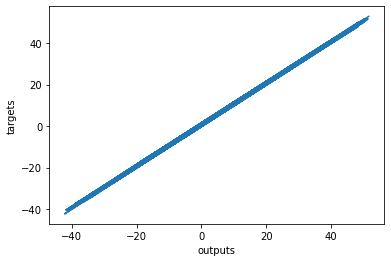

In [25]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

The closer this plot reflects a 45 degree line, the closer the target and output values are. 

### 7. Conclusion


This was a basic introduction to deep learning for machine algorithms. We trained a model using the highly intuitive TensorFlow to achieve results. The equation, y = xw + b, represents the equality of the training model between what the targets (y) are and the weights (xw) and biases (b) within it. The goal in training an algorithm is to have it learn to complete a desired task after numerous attempts (with or without supervision). Each attempt by the machine should be more correct and/or more perfected than the one prior. Our weights, 2.0035 and -3.0036 are what we sought after in our given equation. Our bias, 4.3 is not close enough to 5. Therefore, more adjustments to the algorithm would be needed in order to achieve this result. The final plot output, however, gives us insight into the closeness of relationship between the target and our output values.  